<a href="https://colab.research.google.com/github/sainadhanupoju/Predicting-Housing-Prices/blob/main/Predicting_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title: Predicting Housing Prices**

Project Description:

In this project, we will predict the prices of houses using various features like the
number of rooms, area of the house, location, and other attributes. The goal is to learn how to
apply linear regression and understand the fundamental concepts of supervised learning for
regression tasks. By the end of the project, WE will have a better understanding of data
preprocessing, feature selection, model training, and evaluation.

### **1. Understanding the Problem**

- **Goal**: Predict the price of houses based on features such as the number of rooms, crime rate, etc.
  
- **What is regression?**:
  - Regression is a supervised learning technique where the target is a continuous value. It predicts the relationship between input features (independent variables) and the target (dependent variable).
  - **Why housing prices are a regression problem**: Housing prices are continuous values (e.g., $200,000, $300,500, etc.). The objective is to predict a numeric output, making this a regression task.


**2. Data Collection and Exploration**

loading the dataset by uploading it

In [ ]:
import pandas as pd
data = pd.read_csv("HousingData.csv")
print(data.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


Basic Exploration: Use these functions to understand the dataset:

In [ ]:
print(data.describe())
print(data.info())
print(data.isnull().sum())  # Check for missing values


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.1057

Target and Features:

The target variable is Price (house price).
Features include attributes like the number of rooms (RM), crime rate (CRIM), tax rate (TAX), etc.

3. Data Preprocessing
Handle Missing Values:

In [ ]:
print(data.isnull().sum())  # Check for missing data
# Drop or fill missing values
data = data.dropna()  # If there are few missing values, drop them


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


Feature Scaling: Scaling is important if the features are on different scales. Use StandardScaler for standardization:

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Check if 'MEDV' column exists before scaling
if 'MEDV' in data.columns:
    # Drop 'MEDV' and scale the rest of the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.drop('MEDV', axis=1))

    # Optionally, convert scaled_data back to DataFrame with column names (except 'Price')
    scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns.drop('MEDV'))
else:
    print("Error: 'MEDV' column not found in the DataFrame.")


**Data Visualization**

To visualize the relationships between the features and the target variable (MEDV), you can create scatter plots and a correlation heatmap.

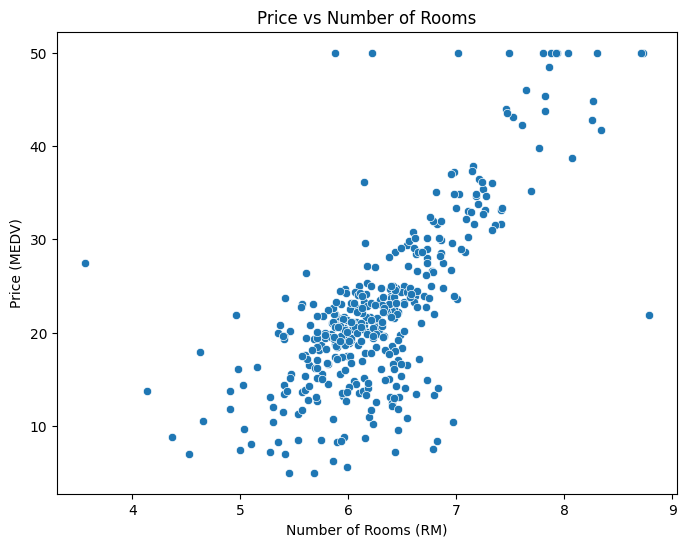

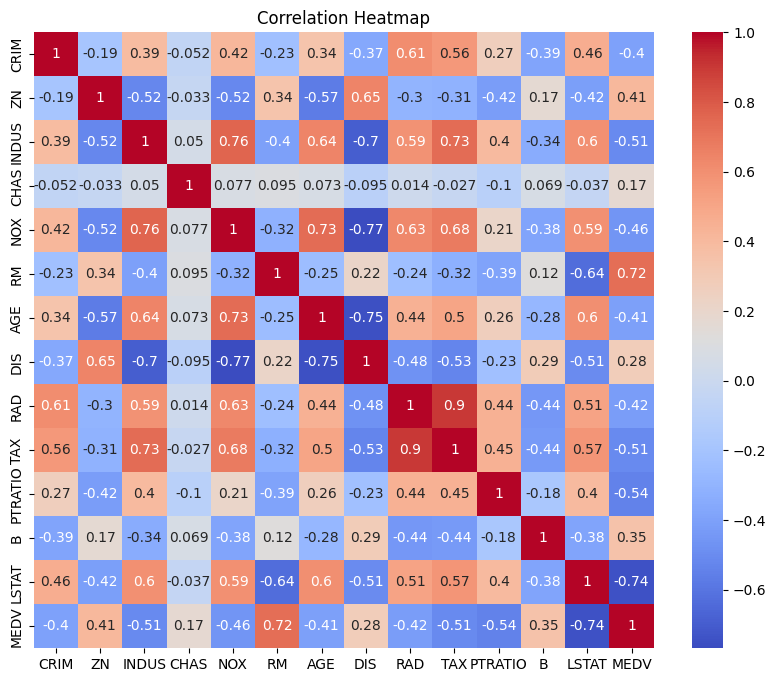

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Price vs Rooms (RM)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['RM'], y=data['MEDV'])
plt.title('Price vs Number of Rooms')
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('Price (MEDV)')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Split the Data

You'll need to split the dataset into training and testing sets to evaluate the model performance.

In [ ]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = data.drop('MEDV', axis=1)  # Features (excluding the target)
y = data['MEDV']               # Target variable (house price)

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 **Train the Regression Model**

Training a linear regression model using the training data.

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


Model coefficients: [-1.12187394e-01  4.24404148e-02  2.56728238e-02  1.98383708e+00
 -1.70792571e+01  4.25809072e+00 -2.17413906e-02 -1.42418883e+00
  2.35587949e-01 -1.19971379e-02 -9.75834850e-01  9.59377961e-03
 -3.88619588e-01]
Model intercept: 33.65240504056528


**Model Evaluation**

After training, evaluate the model on the test dataset using common regression metrics like MAE, MSE, and R².

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using the test set
y_pred = model.predict(X_test)

# Calculate and print the performance metrics
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 3.3679832251542403
Mean Squared Error (MSE): 31.45404766495083
R² Score: 0.6270849941673196


**Model Interpretation**

To understand how each feature impacts the house price, you can print the coefficients of the linear regression model.

In [ ]:
import pandas as pd

# Create a DataFrame of coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Print the coefficients to interpret the feature importance
print(coefficients)


         Coefficient
CRIM       -0.112187
ZN          0.042440
INDUS       0.025673
CHAS        1.983837
NOX       -17.079257
RM          4.258091
AGE        -0.021741
DIS        -1.424189
RAD         0.235588
TAX        -0.011997
PTRATIO    -0.975835
B           0.009594
LSTAT      -0.388620


**Conclusion**

In this step, WE will summarize the overall findings from the project and reflect on the model's performance. Here's a brief overview of what to include:

Model Performance:

Accuracy: Evaluate how well your model predicted house prices using the performance metrics like R² score, Mean Absolute Error (MAE), and Mean Squared Error (MSE).
Interpretation: Did the model make accurate predictions based on the test data? A higher R² score means that the model explained more variance in house prices.
Feature Importance:

Significant Features: From the model coefficients, determine which features had the most influence on the predicted house prices. For example, a large positive coefficient for RM (number of rooms) would suggest that more rooms lead to higher prices, while a large negative coefficient for LSTAT (lower status of the population) might suggest it negatively impacts prices.
Model Limitations:

Potential Issues: Identify any limitations in your model. For instance, the model might not capture non-linear relationships between features or might be sensitive to outliers.
Performance Improvement: Suggest ways to improve the model. You could:
Use more advanced models like Decision Trees or Random Forests.
Apply feature engineering to create new meaningful features.
Increase dataset size by collecting more data to improve generalization.
Try regularization techniques (like Ridge or Lasso) to reduce overfitting if it occurs.
Overall Learnings:

Highlight key takeaways, such as your understanding of linear regression, data preprocessing, and model evaluation techniques.